In [3]:
import qkit
qkit.cfg['load_visa'] = True
qkit.cfg['datafolder_structure'] = 2
# New Qkit does not create folder. Must be done before run! (think a txt doc is created which causes this)
qkit.cfg['datadir'] = r'd:\notebooks\Adam_FMR'
qkit.cfg['run_id'] = 'Test_Rair_Py_21_07_22'
qkit.cfg['user'] = 'Rair'
qkit.start()

from qkit.measure.spectroscopy import spectroscopy
from qkit.storage.store import Data
import qkit.measure.samples_class as sc
import matplotlib.pyplot as plt
from qkit.analysis.circle_fit.circle_fit_2019 import circuit
from scipy import signal as sg
import qkit.analysis.qfit as qfit
from importlib import reload
import qkit.gui.notebook.Progress_Bar as Pb
import qkit.measure.spectroscopy.spectroscopy as spectroscopy
from importlib import reload
import numpy as np
import time

QKIT configuration initialized -> available as qkit.cfg[...]
Starting QKIT framework ... -> qkit.core.startup
Loading module ... S10_logging.py
Loading module ... S14_setup_directories.py
Loading module ... S16_available_modules.py
Loading module ... S20_check_for_updates.py
Loading module ... S25_info_service.py
Loading module ... S30_qkit_start.py
Loading module ... S65_load_RI_service.py
Loading module ... S70_load_visa.py
Loading module ... S80_load_file_service.py
Loading module ... S85_init_measurement.py
Initialized the file info database (qkit.fid) in 0.033 seconds.


Loading module ... S98_started.py
Loading module ... S99_init_user.py


In [4]:
caen = qkit.instruments.create('caen', 'Caen_FAST_PS', address='10.22.197.101')
vna = qkit.instruments.create('vna', 'ZVA_40_VNA', address='GPIB0::20::INSTR')
#hall_probe = qkit.instruments.create('hall_probe', 'Magnet_Physik_FH_54', address='ASRL3::INSTR')


In [5]:
smpl = sc.Sample()
s = spectroscopy.spectrum(vna = vna, exp_name = '', sample = smpl)

comment = """
    test to see VNA second PCB
    """
s.comment = comment
s.measure_1D()

HTML(value="<table style='width:100%'><tr><td> (0/1) </td><td>&#9992; 2022-07-22 (Fri) 13:30:12    </td><td>&#…

IntProgress(value=0, description='VNA_tracedata', layout=Layout(width='95%'), max=1)

d:\notebooks\Adam_FMR\Test_Rair_Py_21_07_22\Rair\RFF9EA_VNA_tracedata\RFF9EA_VNA_tracedata.h5


C:\anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:677: FutureWarning: ask_values is deprecated and will be removed in 1.10, use query_ascii_values or quey_binary_values instead.
  'instead.', FutureWarning)
C:\anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:518: FutureWarning: read_values is deprecated and will be removed in 1.10, use read_ascii_values or read_binary_values instead.
  'instead.', FutureWarning)
C:\anaconda3\lib\site-packages\pyvisa\util.py:266: FutureWarning: parse_binary is deprecated and will be removed in 1.10, use read_ascii_values or read_binary_values instead.
  'instead.', FutureWarning)


Plots saved in d:\notebooks\Adam_FMR\Test_Rair_Py_21_07_22\Rair\RFF9EA_VNA_tracedata\images


In [6]:
caen.on()
caen.get_current()

-0.00461567519233

In [7]:
vna.set_ifbandwidth(3e3)
vna.set_power(-5)
vna.set_startfreq(1.00e9) # use the correct values should be somewhere between 4 and 6 GHz
vna.set_stopfreq(15.00e9)
vna.set_nop(5001)

True

In [8]:
start_current = 2.0
stop_current = 3.2
currents = np.arange(start_current, stop_current, 0.1)

In [9]:
# change the current function accordingly
s.set_x_parameters(currents, 'current', caen.ramp_current, 'A' )


In [10]:
comment = """
    Run test. CoRu PLATE, second PCB board with fibre glass support. 
    Ramping tranmsission line on CAENel from 0.5 to 2.5 A
    """
s.comment = comment
s.set_resonator_fit(fit_resonator=False)

# x_func gets called for every value of i. Here it would be not necessary to define a function for only the ramp fct,
# it will be useful in the next example.
def x_func(i):
    return caen.ramp_current(i, 1e-1)

#s.set_log_function(func=[hall_probe.get_field], name=['Field'], unit=['mT'])

s.set_x_parameters(x_vec = np.arange(0.1, 4.0, 0.1),
                  x_coordname = 'current',
                  x_set_obj = x_func,
                  x_unit = 'A')


s.measure_2D()
caen.ramp_current(0, 3)

HTML(value="<table style='width:100%'><tr><td> (0/39) </td><td>&#9992; 2022-07-22 (Fri) 13:31:19    </td><td>&…

IntProgress(value=0, description='2D VNA sweep current', layout=Layout(width='95%'), max=39)

C:\anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:677: FutureWarning: ask_values is deprecated and will be removed in 1.10, use query_ascii_values or quey_binary_values instead.
  'instead.', FutureWarning)
C:\anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:518: FutureWarning: read_values is deprecated and will be removed in 1.10, use read_ascii_values or read_binary_values instead.
  'instead.', FutureWarning)
C:\anaconda3\lib\site-packages\pyvisa\util.py:266: FutureWarning: parse_binary is deprecated and will be removed in 1.10, use read_ascii_values or read_binary_values instead.
  'instead.', FutureWarning)


d:\notebooks\Adam_FMR\Test_Rair_Py_21_07_22\Rair\RFF9EZ_2D_current\RFF9EZ_2D_current.h5
Plots saved in d:\notebooks\Adam_FMR\Test_Rair_Py_21_07_22\Rair\RFF9EZ_2D_current\images


True

In [11]:
hdf1 = Data(r"d:\notebooks\Adam_FMR/Test_Rair_Py_21_07_22/Rair/RFF9EZ_2D_current/RFF9EZ_2D_current.h5")
#hdf1 = Data(r"d:\notebooks\Luke_LiFe_Tests/Test_Rair_FMR_CoRu_02_11_21/Luke/R1Y5D8_2D_current/R1Y5D8_2D_current.h5")
amp1 = np.transpose(hdf1.data.amplitude[:])
amp1dB = 20*np.log10(amp1)
freq1 = hdf1.data.frequency[:]/1e9
current1 = hdf1.data.current[:]
phase1 = np.transpose(np.unwrap(hdf1.data.phase))

In [12]:
hdf2 = Data(r"d:\notebooks\Adam_FMR/Test_Rair_Py_21_07_22/Rair/RFF9EZ_2D_current/RFF9EZ_2D_current.h5")
amp2 = np.transpose(hdf2.data.amplitude[:])
amp2dB = 20*np.log10(amp2)
freq2 = hdf2.data.frequency[:]/1e9
current2 = hdf2.data.current[:]
phase2 = np.transpose(np.unwrap(hdf2.data.phase))

In [13]:
def NormalizeData(data):
    return (data - min(data)) / (max(data) - min(data))


In [50]:
rows1=amp1.shape[0]
cols1=amp1.shape[1]

#print("amp1 = ",amp1[1])
test = NormalizeData(amp1[1])
#print("normalised data = ",test)
'''print(amp1.shape)
print(amp1[1])
print(NormalizeData(amp1[1]))'''



namp1=np.zeros((rows1,cols1))
namp1dB=np.zeros((rows1,cols1))
nphase1=np.zeros((rows1,cols1))
test1 = 0
for x in range(0, cols1 - 1):
    test1 = NormalizeData(amp1[x])
    for y in range(0, rows1 -1):
        #print(amp1[y,x], amp1[y,0])
        #print(amp1[y,x]/amp1[y,0])
        namp1[y,x]=(amp1[y,x]/amp1[y,0])
        namp1dB[y,x]=20*np.log10(amp1[y,x])-20*np.log10(amp1[y,0])
        nphase1[y,x] = phase1[y,x] - phase1[y,0]
        
if namp1dB.all() == test1.all():
    print("it works")
else:
    print("doesn't work")
        
testnamp1=np.zeros((rows1,cols1))
testamp1dB=np.zeros((rows1,cols1))
testphase1=np.zeros((rows1,cols1))
for x in range(0, cols1 - 1):
    for y in range(0, rows1 -1):
        namp1[y,x]=(amp1[y,x]/amp1[y,0])
        namp1dB[y,x]=20*np.log10(amp1[y,x])-20*np.log10(amp1[y,0])
        nphase1[y,x] = phase1[y,x] - phase1[y,0]
for i in range(len(amp1)):
    testamp1 = NormalizeData(amp1[i])
    #testamp1dB = 20*np.log10()

    
    
    
    
    
for x in range(0, cols1 - 1):
    testamp1dB = 20*np.log10(NormalizeData(amp1[x]))
    testphase = NormalizeData(phase1[x])
    
    '''for y in range(0, rows1 -1):
        namp1[y,x]=(amp1[y,x]/amp1[y,0])
        namp1dB[y,x]=20*np.log10(amp1[y,x])-20*np.log10(amp1[y,0])
        nphase1[y,x] = phase1[y,x] - phase1[y,0] '''   
    
print(testamp1dB)
    

#rows2=amp2.shape[0]
#cols2=amp2.shape[1]

#namp2=np.zeros((rows2,cols2))
#namp2dB=np.zeros((rows2,cols2))
#nphase2=np.zeros((rows2,cols2))
#for x in range(0, cols2 - 1):
#    for y in range(0, rows2 -1):
#        namp2[y,x]=(amp2[y,x]/amp2[y,0])
#        namp2dB[y,x]=20*np.log10(amp2[y,x])-20*np.log10(amp2[y,0])
#        nphase2[y,x] = phase2[y,x] - phase2[y,0]

#need

it works
[       -inf -5.803161   -1.4909234  -1.4628924  -1.5780629  -1.6235173
 -1.673001   -1.9868666  -5.685911   -0.30651233 -0.39598    -0.33549103
  0.         -0.42122704 -0.18409681 -0.44042695 -0.37825298 -0.1414969
 -0.6423559  -0.8832207  -0.746663   -0.82486415 -0.8640481  -1.1204003
 -0.7528838  -1.3162229  -1.2485566  -1.631524   -1.5901787  -2.5904276
 -2.517688   -2.8046427  -2.9233613  -4.071334   -7.6464987  -9.106177
 -8.551935   -8.265909   -8.411646  ]


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0, 0.5, 'Frequency [GHz]')

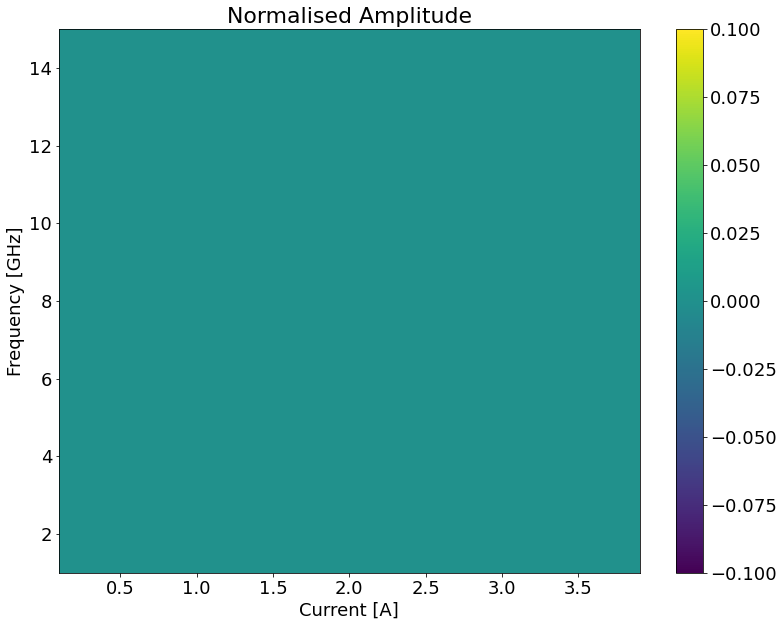

In [45]:
plt.figure(figsize=(13,10))
plt.pcolormesh(current1[:],freq1[:],testamp1dB[:])
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.tick_params(labelsize=18)
#plt.xticks(size = 18)
#plt.yticks(size = 18)
plt.title('Normalised Amplitude', fontsize=22)
plt.xlabel('Current [A]', fontsize=18)
plt.ylabel('Frequency [GHz]', fontsize=18)


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0, 0.5, 'Frequency [GHz]')

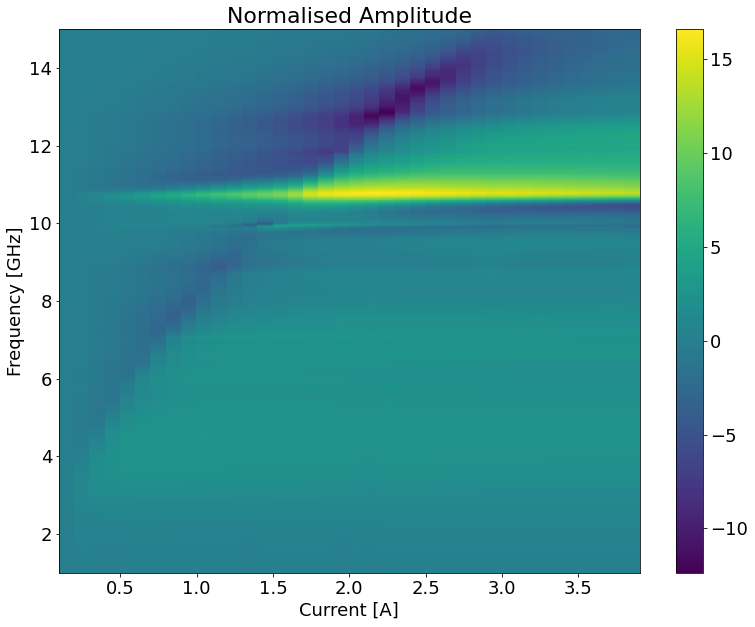

In [12]:
plt.figure(figsize=(13,10))
plt.pcolormesh(current1[:],freq1[:],namp1dB[:])
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.tick_params(labelsize=18)
#plt.xticks(size = 18)
#plt.yticks(size = 18)
plt.title('Normalised Amplitude', fontsize=22)
plt.xlabel('Current [A]', fontsize=18)
plt.ylabel('Frequency [GHz]', fontsize=18)

#need